In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [0]:
# Remove Folder
import shutil
import os

shutil.rmtree('car_ims')
shutil.rmtree('cropped_car_train')

# Perform Loading and Preprocessing Datasets 
In this occasion, we build transformed and normalized datasets through TensorFlow 2.0 ImageDataGenerator. ImageDataGenerator is api from TensorFlow to perform preprocessing data for image processing. Through ImageDataGenerator, we are also performing splitting for data into training and test data. 

## 1. Download Datasets
Datasets including training and testing dataset were loaded from [stanford cars datasets](http://ai.stanford.edu/~jkrause/cars/car_dataset). Datasets are formed in .tgz format. From the web, we have known that label of the data are separated from training and validation dataset. Therefore, we need to download the label separately [label](http://ai.stanford.edu/~jkrause/cars/car_devkit.tgz) 

In [0]:
!wget --no-check-certificate \
  http://imagenet.stanford.edu/internal/car196/cars_train.tgz \
  http://imagenet.stanford.edu/internal/car196/cars_test.tgz \

!wget --no-check-certificate \
    http://imagenet.stanford.edu/internal/car196/cars_annos.mat \

--2019-08-13 22:25:06--  http://imagenet.stanford.edu/internal/car196/cars_train.tgz
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979269282 (934M) [application/x-gzip]
Saving to: ‘cars_train.tgz’

cars_train.tgz      100%[===================>] 933.90M  4.56MB/s    in 3m 45s  

2019-08-13 22:28:52 (4.15 MB/s) - ‘cars_train.tgz’ saved [979269282/979269282]

--2019-08-13 22:28:52--  http://imagenet.stanford.edu/internal/car196/cars_test.tgz
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977350468 (932M) [application/x-gzip]
Saving to: ‘cars_test.tgz’

cars_test.tgz       100%[===================>] 932.07M  15.5MB/s    in 5m 5s   

2019-08-13 22:33:57 (3.06 MB/s) - ‘cars_test.tgz’ saved [977350468/977350468]

FINISHED --20

In [0]:
#Download dataset

!gdown https://drive.google.com/uc?id=1VXAuj8P9FJaQK7bYFU2U3UwEYHCdRMvB


#!gdown https://drive.google.com/uc?id=1a_3hAT9Jr7jtWrJ5HSh5q6HlK0P8GUZa
  
# Unzip dataset
!unzip compressed.zip 


Downloading...
From: https://drive.google.com/uc?id=1VXAuj8P9FJaQK7bYFU2U3UwEYHCdRMvB
To: /content/compressed.zip
312MB [00:02, 136MB/s]
Archive:  compressed.zip
   creating: cropped_car_train/
   creating: cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/
  inflating: cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/02603.jpg  
  inflating: cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/04626.jpg  
  inflating: cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/03998.jpg  
  inflating: cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/03352.jpg  
  inflating: cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/08119.jpg  
  inflating: cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/03656.jpg  
  inflating: cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/06165.jpg  
  inflating: cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/06444.jpg  
  inflating: cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/06834.jpg  
  inflating: cropped_car_train/Chevro

In [0]:
#unzip another copy for validation only
!mkdir original

!unzip compressed.zip -d original

Archive:  compressed.zip
   creating: original/cropped_car_train/
   creating: original/cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/
  inflating: original/cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/02603.jpg  
  inflating: original/cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/04626.jpg  
  inflating: original/cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/03998.jpg  
  inflating: original/cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/03352.jpg  
  inflating: original/cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/08119.jpg  
  inflating: original/cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/03656.jpg  
  inflating: original/cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/06165.jpg  
  inflating: original/cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/06444.jpg  
  inflating: original/cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/06834.jpg  
  inflating: original/cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/

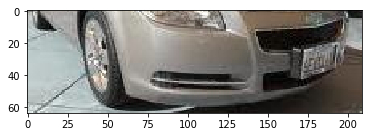

In [0]:
#Testing out data augmentation procedures

from matplotlib import pyplot as plt
import cv2
imname='../content/cropped_car_train/Chevrolet Malibu Hybrid Sedan 2010/02603.jpg'
im = cv2.imread(imname)
h,w = im.shape[:2]
midh = h/2
midw = w/2
"""
crop1 = im[0:int(h/2),0:int(w/2)]
crop2 = im[int(h/2):int(h),int(w/2):int(w)]
crop3 = im[0:int(h/2),int(w/2):int(w)]
crop4 = im[int(h/2):int(h),0:int(w/2)]

"""


crop1 = im[0:int(h),0:int(w/2)]
crop2 = im[0:int(h),int(w/2):int(w)]
crop3 = im[0:int(h/2),0:int(w)]
crop4 = im[int(h/2):int(h),0:int(w)]

plt.imshow(crop4)

In [0]:
#Segmentation-based cropping of images into two sets of halves

imagestorage = '../content/cropped_car_train'
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img, save_img
import tensorflow as tf
tf.enable_eager_execution()

fname = []
dirnames= []

for root,d_names,f_names in os.walk(imagestorage):
    #print(d_names)
    for f in f_names:
        fname.append(os.path.join(root, f))
    for d in d_names:
        dirnames.append(os.path.join(root, d))
#print(dirnames) 

#Iterate directory subfolder names

for dir in dirnames:
    files = os.listdir(dir)
    #Each subfolder has a differring number of files in it, so we iterate with an int tracker
    i=0
    for f in files:
        
        #First we generate the entire path within a directory to each individual file
        filename = os.path.join(dir,f)
        print("Generating quarter crops for file "+str(filename))
        #print(filename)
        #Next, we apply the quartering crop
        im = cv2.imread(filename)
        h,w = im.shape[:2]
        midh = h/2
        midw = w/2
        crop1 = im[0:int(h),0:int(w/2)]
        crop2 = im[0:int(h),int(w/2):int(w)]
        crop3 = im[0:int(h/2),0:int(w)]
        crop4 = im[int(h/2):int(h),0:int(w)]
        
      
        
        
        filecrop1 = str(i)+'crop1.jpg'
        filecrop2=str(i)+'crop2.jpg'
        filecrop3 = str(i)+'crop3.jpg'
        filecrop4 = str(i)+'crop4.jpg'
        
      
        
        #Create the new filenames for the 
        filesave1=os.path.join(dir,filecrop1)
        filesave2=os.path.join(dir,filecrop2)
        filesave3=os.path.join(dir,filecrop3)
        filesave4=os.path.join(dir,filecrop4)
        
    
        #print(filesave1)
        save_img(filesave1, crop1)
        save_img(filesave2, crop2)
        save_img(filesave3, crop3)
        save_img(filesave4, crop4)
        
       
        #print(filesave)
        i=i+1
        



Generating quarter crops for file ../content/cropped_car_train/Chrysler PT Cruiser Convertible 2008/08100.jpg
Generating quarter crops for file ../content/cropped_car_train/Chrysler PT Cruiser Convertible 2008/02709.jpg
Generating quarter crops for file ../content/cropped_car_train/Chrysler PT Cruiser Convertible 2008/06657.jpg
Generating quarter crops for file ../content/cropped_car_train/Chrysler PT Cruiser Convertible 2008/07787.jpg
Generating quarter crops for file ../content/cropped_car_train/Chrysler PT Cruiser Convertible 2008/04238.jpg
Generating quarter crops for file ../content/cropped_car_train/Chrysler PT Cruiser Convertible 2008/01307.jpg
Generating quarter crops for file ../content/cropped_car_train/Chrysler PT Cruiser Convertible 2008/04695.jpg
Generating quarter crops for file ../content/cropped_car_train/Chrysler PT Cruiser Convertible 2008/01823.jpg
Generating quarter crops for file ../content/cropped_car_train/Chrysler PT Cruiser Convertible 2008/02981.jpg
Generating

## 2. Data Normalization, Augmentation, and  Data Split
Data normalization is performed to get normalized value from each tensor value in images. We use mean and standard deviation normalization method for this project.

### Extracting the dataset
The following code wil perform extraction from tgz data into main folder

In [0]:
import tarfile

# Uncompress Train Data
local_tgz = 'cars_train.tgz' 
tar_ref = tarfile.open(local_tgz, 'r')
tar_ref.extractall()
tar_ref.close()

# Uncompress Test Data
local_tgz = 'cars_test.tgz' 
tar_ref = tarfile.open(local_tgz, 'r')
tar_ref.extractall()
tar_ref.close()

# Uncompress Devkit
local_tgz = 'car_devkit.tgz' 
tar_ref = tarfile.open(local_tgz, 'r')
tar_ref.extractall()
tar_ref.close()

KeyboardInterrupt: ignored

## 2. Convert datasets from .mat into pandas dataframe

In [0]:
def get_labels(annot_dir):
    MAT = loadmat(annot_dir)
    annotations = MAT["annotations"][0,:]
    nclasses = len(MAT["class_names"][0])
    class_names = dict(zip(range(1,nclasses),[c[0] for c in MAT["class_names"][0]]))
    
    labelled_images = {}
    dataset = []
    for arr in annotations:
        # the first entry in the row is the image name
        # The rest is the data, first bbox, then classid then a boolean for whether in train or test set
        dataset.append([arr[0][0].replace('car_ims/','')] + [y[0][0] for y in arr][1:])
    DF = pd.DataFrame(dataset, 
                      columns =['filename',"BBOX_Y2","BBOX_X1","BBOX_Y1","BBOX_X2","ClassID","TestSet"])
    DF = DF.assign(ClassName=DF.ClassID.map(dict(class_names)))
    return DF

In [0]:
# Load Annotations file from cars_annost.mat
from scipy.io import loadmat 

annot_dir = 'cars_annos.mat'

pd_cars = get_labels(annot_dir)

In [0]:
pd_cars

,filename,BBOX_Y2,BBOX_X1,BBOX_Y1,BBOX_X2,ClassID,TestSet,ClassName
0,000001.jpg,112,7,853,717,1,0,AM General Hummer SUV 2000
1,000002.jpg,48,24,441,202,1,0,AM General Hummer SUV 2000
2,000003.jpg,7,4,277,180,1,0,AM General Hummer SUV 2000
3,000004.jpg,33,50,197,150,1,0,AM General Hummer SUV 2000
4,000005.jpg,5,8,83,58,1,0,AM General Hummer SUV 2000
5,000006.jpg,10,6,250,110,1,0,AM General Hummer SUV 2000
6,000007.jpg,56,1,394,176,1,0,AM General Hummer SUV 2000
7,000008.jpg,1,13,113,83,1,0,AM General Hummer SUV 2000
8,000009.jpg,15,111,271,272,1,0,AM General Hummer SUV 2000
9,000010.jpg,14,18,148,107,1,0,AM General Hummer SUV 2000


In [0]:
# Replace NaN to 'Unknown'
pd_cars['ClassName'].fillna('Unknown', inplace=True)
class_set = set(pd_cars['ClassName'])

## 3. Split datasets into train and test set

In [0]:
import os
import random
from shutil import copyfile
from sklearn.model_selection import train_test_split
import shutil

def img_train_test_split(img_source_dir, pd_cars, class_set):
    """
    Randomly splits images over a train and test folder, while preserving the folder structure
    
    Parameters
    ----------
    img_source_dir : string
        Path to the folder with the images to be split. Can be absolute or relative path   
        
    train_size : float
        Proportion of the original images that need to be copied in the subdirectory in the train folder
    
    pd_dataframe : pandas data frame
        datasets in the form of pandas that cointains filename and label 
    """
    # Separate dataframe into train and test dataframe
    pd_cars_train = pd_cars[pd_cars['TestSet'] == 0]
    pd_cars_test = pd_cars[pd_cars['TestSet'] == 1]

    
    
    if os.path.exists('datacars'):
        shutil.rmtree('datacars')
    if not (isinstance(img_source_dir, str)):
        raise AttributeError('img_source_dir must be a string')
        
    if not os.path.exists(img_source_dir):
        raise OSError('img_source_dir does not exist')
        
    if not (isinstance(train_size, float)):
        raise AttributeError('train_size must be a float')
        
    # Set up empty folder structure if not exists
    if not os.path.exists('datacars'):
        os.makedirs('datacars')
    else:
        if not os.path.exists('datacars/train'):
            os.makedirs('datacars/train')
        if not os.path.exists('datacars/test'):
            os.makedirs('datacars/test')
           
    train_subdir = os.path.join('datacars/train', '')
    test_subdir = os.path.join('datacars/test', '')
        
    # Create subdirectories in train and test folders
    if not os.path.exists(train_subdir):
        os.makedirs(train_subdir)
    if not os.path.exists(test_subdir):
        os.makedirs(test_subdir)
        
    # Make subdirectories of class
    for class_name in class_set:
      class_train_subdir = os.path.join('datacars/train', class_name)
      class_test_subdir = os.path.join('datacars/test', class_name)
      if not os.path.exists(class_train_subdir):
          os.makedirs(class_train_subdir)
      if not os.path.exists(class_test_subdir):
          os.makedirs(class_test_subdir)      
  
    train_counter = 0
    test_counter = 0
    
    for class_name in class_set:
      
    # Duplicating train data into new train directory
    for train_filename in x_train['filename']:
        copyfile(os.path.join(img_source_dir, train_filename), os.path.join(train_subdir, train_filename))
        train_counter += 1
        
    # Duplicating test data into new test directory
    for test_filename in x_test['filename']:
        copyfile(os.path.join(img_source_dir, test_filename), os.path.join(test_subdir, test_filename))
        test_counter += 1
        
    print('Copied ' + str(train_counter) + ' images to /datacars/train/')
    print('Copied ' + str(test_counter) + ' images to /datacars/test/')
    
    return x_train, x_val, x_test, y_train, y_val, y_test
  
def crop_image(dir, )

In [0]:
# Perform splitting into train and test, and returning splitted dataframe
x_labels = ['filename', 'BBOX_Y2', 'BBOX_X1', 'BBOX_Y1', 'BBOX_X2']
y_labels = ['ClassID', 'TestSet', 'ClassName']
img_source_dir = '/tmp/car_ims/'
x_train, x_val, x_test, y_train, y_val, y_test  = img_train_test_split(img_source_dir, 
                                                         pd_dataframe = pd_cars, 
                                                         x_labels = x_labels,
                                                         y_labels = y_labels,
                                                         train_size = 0.8)

Copied 10358 images to /tmp/data/train/
Copied 2590 images to /tmp/data/validation/
Copied 3237 images to /tmp/data/test/


## 4. Generate ImageGenerator Class for transforming and augmenting Datasets

In [0]:
# Join train dataframe
train_df = pd.concat([x_train, y_train], axis = 1, sort = False)

# Join validation dataframe
validation_df = pd.concat([x_val, y_val], axis = 1, sort = False)

# Join test dataframe
test_df = pd.concat([x_test, y_test], axis = 1, sort = False)

# Replace NaN with 'Unknown'
train_df['ClassName'].fillna('Unknown', inplace=True)
validation_df['ClassName'].fillna('Unknown', inplace=True)
test_df['ClassName'].fillna('Unknown', inplace=True)

In [0]:
# Check if there is remain NaN 
print('Training Data:\n', np.sum(train_df.isna()))
print(10*'==')
print('Validation Data:\n', np.sum(validation_df.isna()))
print(10*'==')
print('Test Data:\n', np.sum(test_df.isna()))

Training Data:
 filename     0
BBOX_Y2      0
BBOX_X1      0
BBOX_Y1      0
BBOX_X2      0
ClassID      0
TestSet      0
ClassName    0
dtype: int64
Validation Data:
 filename     0
BBOX_Y2      0
BBOX_X1      0
BBOX_Y1      0
BBOX_X2      0
ClassID      0
TestSet      0
ClassName    0
dtype: int64
Test Data:
 filename     0
BBOX_Y2      0
BBOX_X1      0
BBOX_Y1      0
BBOX_X2      0
ClassID      0
TestSet      0
ClassName    0
dtype: int64


In [0]:
import keras_preprocessing
from keras_preprocessing.image import ImageDataGenerator


# Build ImageDataGenerator for train, validation, and test set
training_datagen = ImageDataGenerator(rescale = 1./255,
                                     rotation_range = 50,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                      fill_mode='nearest',
                                      validation_split = 0.2
                                     )


test_datagen = ImageDataGenerator(rescale = 1./255)


training_dir = 'cropped_car_train'
test_dir = 'original/cropped_car_train'

# Process generator

train_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='training',
    seed=0
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    seed = 0
)

Found 32576 images belonging to 196 classes.
Found 8144 images belonging to 196 classes.


# Build Models

## 1. Load Pre-Trained Models 

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop

## Build Model 

In [0]:
pip install livelossplot

In [0]:
from livelossplot.tf_keras import PlotLossesCallback

plot_losses = PlotLossesCallback()

In [0]:
#Initialize MobileNetV2 model - chosen for speed and possibility of millisecond recognition
import tensorflow as tf
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

# Fine tune from this layer onwards, theory is to improve recognition.
fine_tune_at = 75

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='relu'),
  #keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(196, activation='softmax')
])

print(model.summary())
#Roughly 54 layers



adam = tf.keras.optimizers.Adam(lr=0.0002)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])

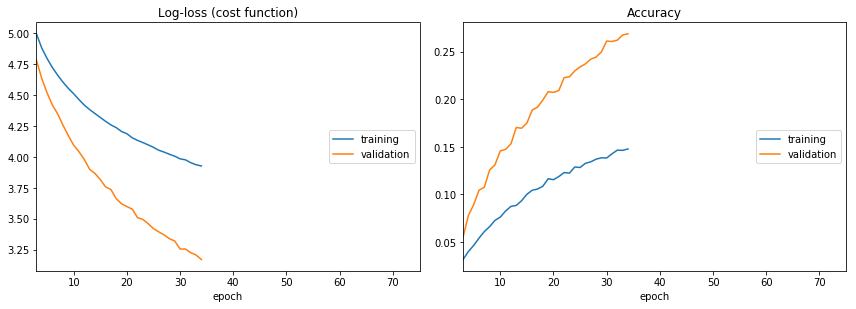

Log-loss (cost function):
training   (min:    3.927, max:    5.270, cur:    3.927)
validation (min:    3.171, max:    5.159, cur:    3.171)

Accuracy:
training   (min:    0.010, max:    0.148, cur:    0.148)
validation (min:    0.025, max:    0.269, cur:    0.269)
509/509 [==============================] - 513s 1s/step - loss: 3.9272 - acc: 0.1477 - val_loss: 3.1709 - val_acc: 0.2688
Epoch 35/75
 26/509 [>.............................] - ETA: 4:43 - loss: 3.9173 - acc: 0.1478

In [0]:
#Training model - done one epoch at a time to observe accuracy
batch_size = 64
epochs = 1
steps_per_epoch = train_generator.n // batch_size
validation_steps = test_generator.n // batch_size

history = model.fit_generator(train_generator,
                              epochs=75,
                              steps_per_epoch = steps_per_epoch,
                              workers = 4,
                              validation_data = test_generator,
                              validation_steps=validation_steps,
                              callbacks=[plot_losses])

In [0]:
history = model.fit_generator(train_generator,
                                  epochs=100,
                                  verbose = 1,
                                   callbacks=[plot_losses])



Epoch 1/100
 300/1018 [=======>......................] - ETA: 5:50 - loss: 5.3032 - acc: 0.0069

KeyboardInterrupt: ignored

In [0]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# plot acc and loss
plt.figure(1)
plt.subplot(211)
plt.title('Training and Validation Accuracy')
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.legend(loc = 0)

plt.subplot(212)
plt.title('Training and Validation Loss')
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.subplots_adjust(left=None, bottom=0, right=None, top=None, wspace=0, hspace=1)
plt.legend(loc = 0)

plt.show()

NameError: ignored

In [0]:
# Save Model
model.save('models/deepcars.h5')